- Gunakan dataset all_cars.csv
- Buat asumsi 
- Tampilkan visualisasi 
- Buat Insight

1. Buat histogram untuk melihat persebaran data pajak mobil (tax)
2. Buat histogram untuk membandingkan persebaran data harga mobil (price) untuk tiap brand mobil (brand)
3. Buat boxplot untuk melihat persebaran data jarak tempuh (mileage)
4. Buat boxplot untuk membandingkan persebaran jarak tempuh (mileage) untuk tiap brand mobil (brand)
5. Buat lineplot untuk melihat perkembangan rata-rata harga mobil (price) untuk tiap tahun produksi (year)

In [116]:
import pandas as pd
import numpy as np

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [117]:
df = pd.read_csv('all_cars.csv').drop(columns= 'Unnamed: 0')
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4,Audi
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0,Audi
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4,Audi
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0,Audi
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0,Audi
...,...,...,...,...,...,...,...,...,...,...
22261,IQ,2011,5500,Automatic,30000,Petrol,20,58.9,1.0,Toyota
22262,Urban Cruiser,2011,4985,Manual,36154,Petrol,125,50.4,1.3,Toyota
22263,Urban Cruiser,2012,4995,Manual,46000,Diesel,125,57.6,1.4,Toyota
22264,Urban Cruiser,2011,3995,Manual,60700,Petrol,125,50.4,1.3,Toyota


1. Buat histogram untuk melihat persebaran data pajak mobil (tax)

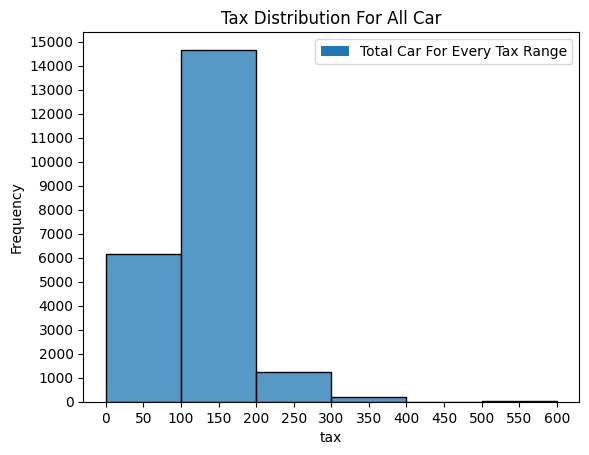

In [118]:
sns.histplot(data=df, x='tax',binrange=(0,600), binwidth= 100)

plt.title('Tax Distribution For All Car')
plt.ylabel('Frequency')
plt.legend(['Total Car For Every Tax Range'])
plt.xticks(ticks= range(0,601,50))
plt.yticks(ticks= range(0,16000,1000));

## Insight:
- 0 - 99    =   6138
- 100 - 199 =   14661
- 200 - 299 =   1218
- 300 - 399 =   205
- 500 - 599 =   44

- memiliki 40 unique tax
- tax yang rangenya 100-199 memiliki jumlah mobil yang paling banyak
- Persebaran data right-skewed

In [119]:
len(df[df['tax'].between(0,99)])

6138

In [120]:
len(df[df['tax'].between(100,199)])

14661

In [121]:
len(df[df['tax'].between(200,299)])

1218

In [122]:
len(df[df['tax'].between(300,399)])

205

In [123]:
len(df[df['tax'].between(500,599)])

44

In [124]:
len(df['tax'].value_counts())

40

2. Buat histogram untuk membandingkan persebaran data harga mobil (price) untuk tiap brand mobil (brand)

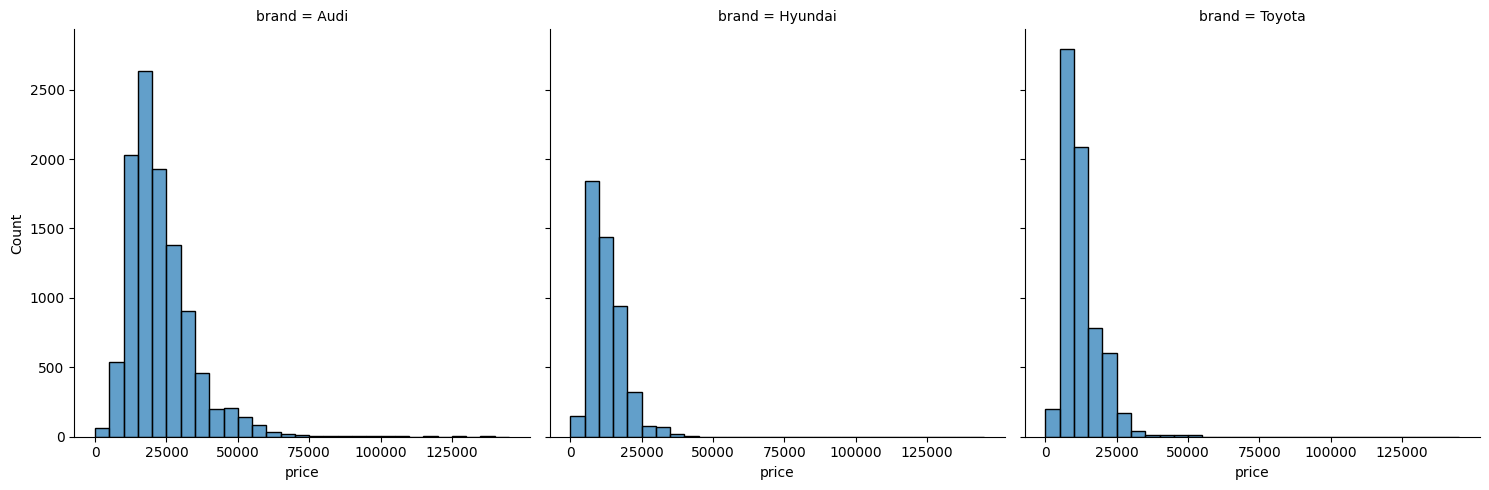

In [125]:
sns.displot(data=df, x='price', col='brand', alpha=0.7, bins=20, binwidth= 5000, binrange = (0,145000))
plt.xticks(ticks=range(0,140001,25000))
plt.ylabel('Frequency');
#plt.title('Price Distribution For Each Brand');


## Insight:
- Semua brand right-skewed
- Semua brand menjual mobil paling banyk pada harga di range 0-24999
- Audi paling banyak di 15-20k sedangkan untuk hyundai dan toyota di 10-15k

<Figure size 3000x2000 with 0 Axes>

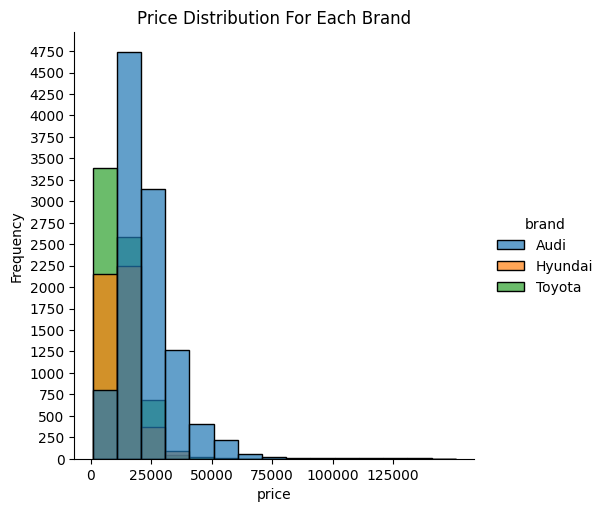

In [126]:
plt.figure(figsize=(30,20))

sns.displot(data=df, x='price', hue='brand', alpha=0.7,bins=10, binwidth= 10000)
plt.xticks(ticks= range(0,140001,25000))
plt.yticks(ticks= range(0,5000,250))
plt.title('Price Distribution For Each Brand')
plt.ylabel('Frequency');


# Insight:
- untuk harga 0-9999 : jumlah mobil toyota > Hyundai > Audi
- untuk harga 10000-19999 : jumlah mobil Audi > Toyota > Hyundai
- untuk harga 20000-29999 : jumlah mobil Audi > Toyota > Hyundai
- untuk harga 30000-39999 : jumlah mobil Audi > Toyota > Hyundai

<AxesSubplot: xlabel='price', ylabel='Density'>

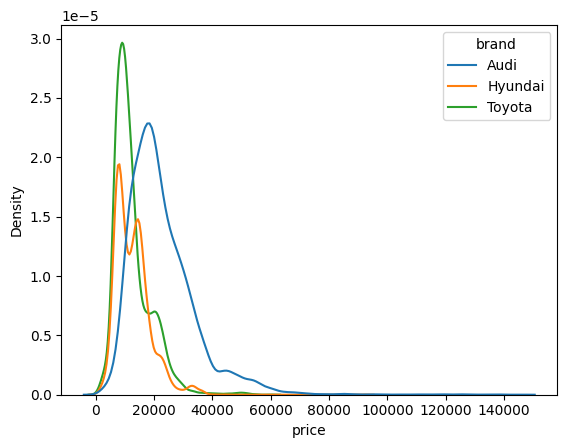

In [127]:
sns.kdeplot(data=df, x='price', hue= 'brand')

## Insight:
- Brand yang memilki mobil harga paling mahal adalah Audi

3. Buat boxplot untuk melihat persebaran data jarak tempuh (mileage)

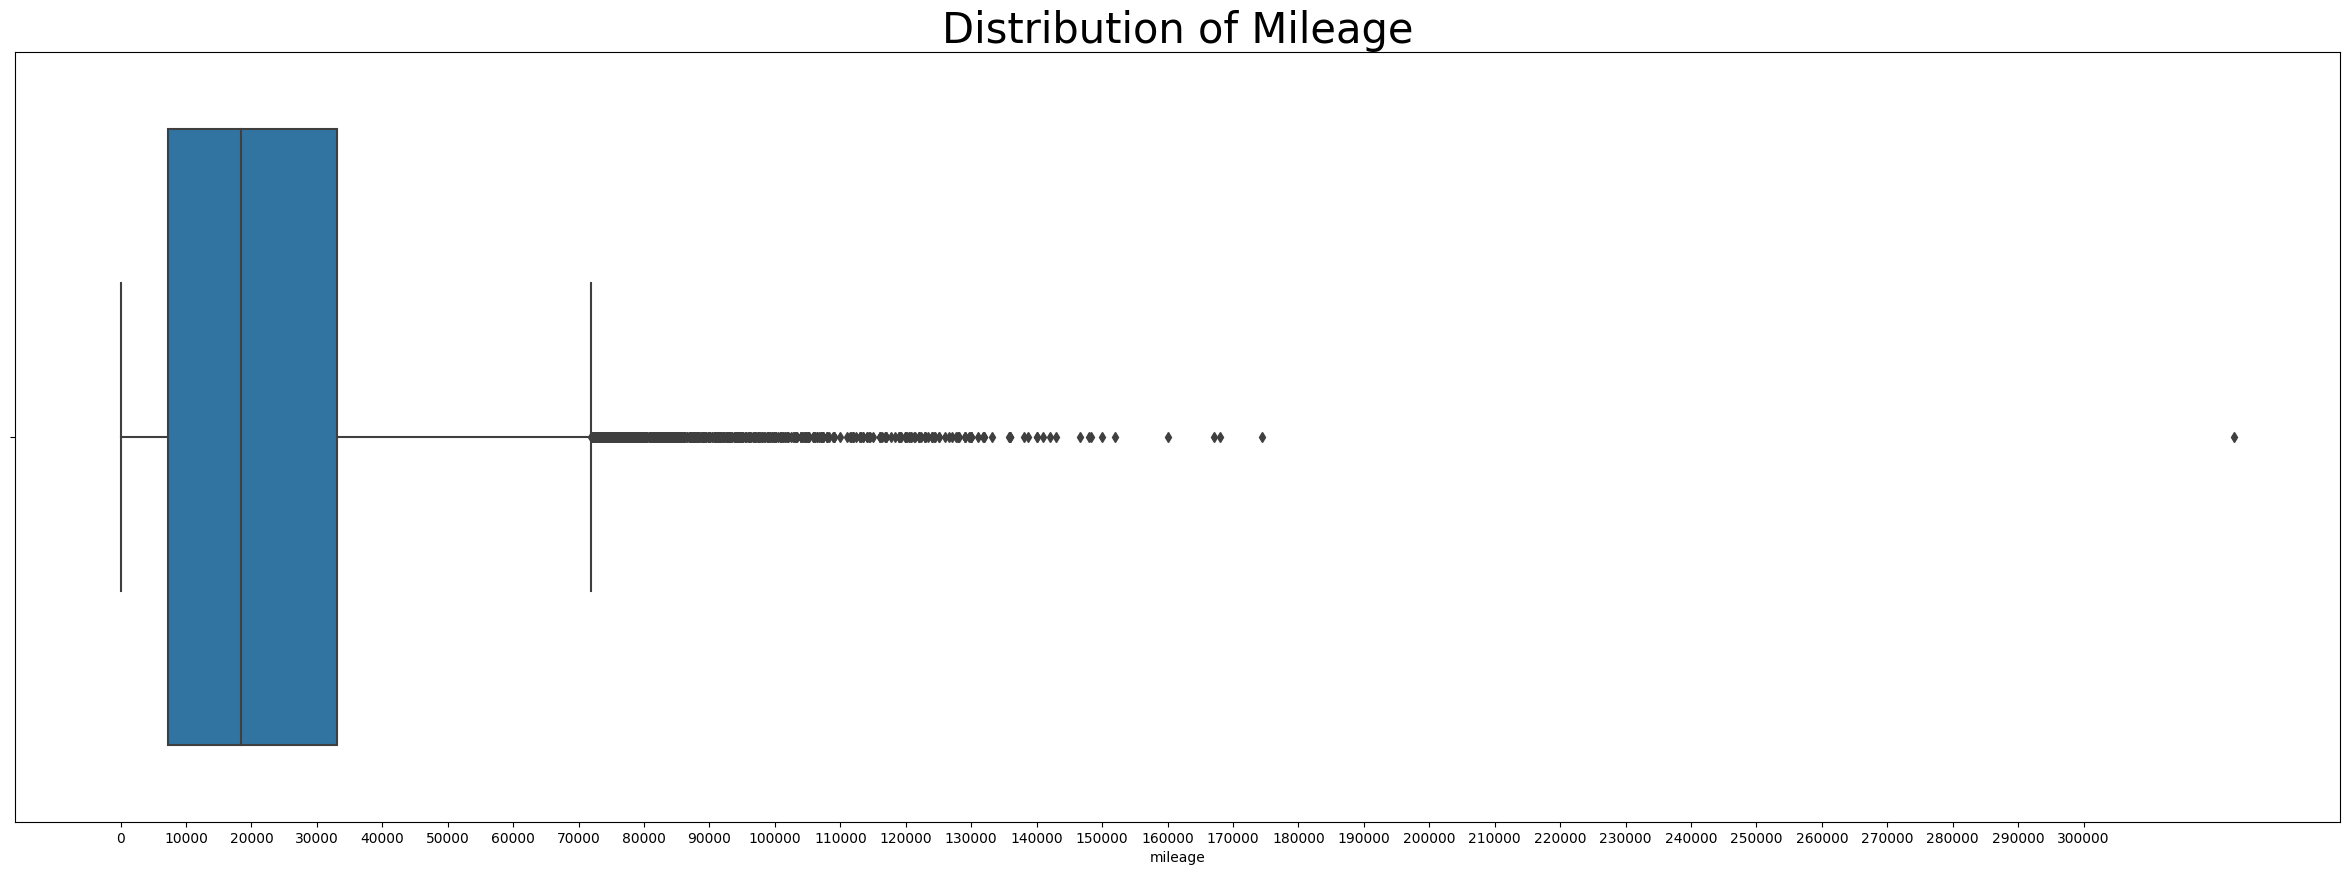

In [128]:
plt.figure(figsize=(30,10))
sns.boxplot(data=df, x='mileage')
plt.title('Distribution of Mileage',size=30)
plt.xticks(ticks=range(0,300001,10000));

In [129]:
df['mileage'].describe()

count     22266.000000
mean      23501.863604
std       21111.157417
min           1.000000
25%        7200.000000
50%       18354.000000
75%       33100.750000
max      323000.000000
Name: mileage, dtype: float64

In [130]:
df['mileage'].median()

18354.0

In [131]:
q1 = 7200
q3 = 33100

IQR = q3-q1
IQR

25900

In [132]:
lower_outlier = q1 - (1.5 * IQR)
lower_outlier

-31650.0

In [133]:
upper_outlier = q3 + (1.5 * IQR)
upper_outlier

71950.0

#Insight:
- Median Mileage adalah 18354
- IQRnya adalah 25900
- Rata-Rata mileagenya adalah 23501
- High Outliernya adalah 71950 diatas ini dianggap outlier
- Lower Outliernya adalah -31650 di bawah ini dianggap outlier


4. Buat boxplot untuk membandingkan persebaran jarak tempuh (mileage) untuk tiap brand mobil (brand)

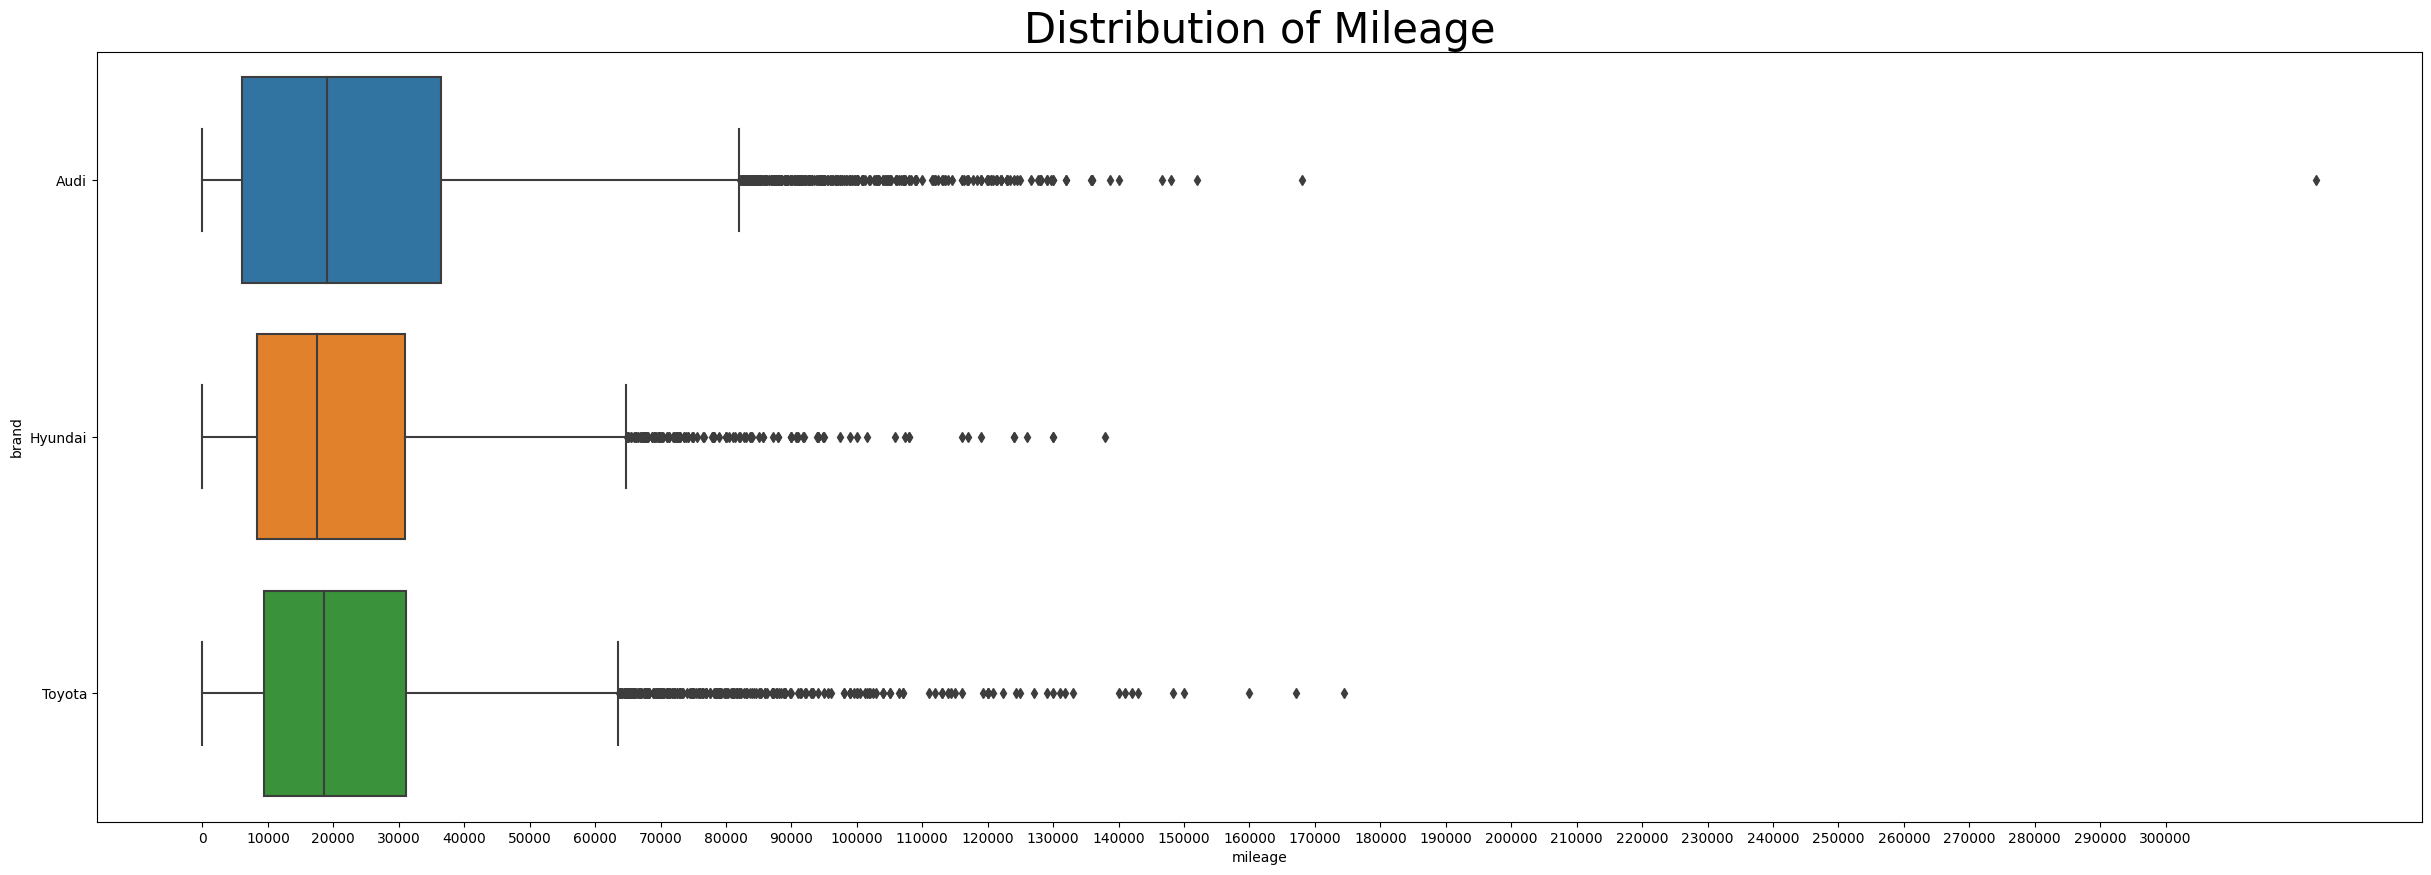

In [134]:
plt.figure(figsize=(30,10))
sns.boxplot(data=df, x='mileage',y='brand')
plt.title('Distribution of Mileage', size=30)
plt.xticks(ticks=range(0,300001,10000), size=10);

In [135]:
audi_mileage = df[df['brand'] == 'Audi'][['mileage']]
audi_mileage.describe()

,mileage
count,10668.000000
mean,24827.244001
std,23505.257205
min,1.000000
25%,5968.750000
50%,19000.000000
75%,36464.500000
max,323000.000000


In [136]:
audi_q1 = audi_mileage.quantile(0.25)

In [137]:
audi_q2 = audi_mileage.quantile(0.50)

In [138]:
audi_q3 = audi_mileage.quantile(0.75)

In [139]:
audi_iqr = q3-q1
audi_iqr

25900

In [140]:
lower_outlier_audi = audi_q1 - (1.5*audi_iqr)
lower_outlier_audi

mileage   -32881.25
Name: 0.25, dtype: float64

In [141]:
higher_outlier_audi = audi_q3 + (1.5*audi_iqr)
higher_outlier_audi

mileage    75314.5
Name: 0.75, dtype: float64

In [142]:
hyundai_mileage = df[df['brand'] == 'Hyundai'][['mileage']]
hyundai_mileage.describe()

,mileage
count,4860.000000
mean,21486.049588
std,17710.196964
min,1.000000
25%,8339.250000
50%,17462.000000
75%,30967.000000
max,138000.000000


In [143]:
hyundai_q1 = hyundai_mileage.quantile(0.25)

In [144]:
hyundai_q2 = hyundai_mileage.quantile(0.50)

In [145]:
hyundai_q3 = hyundai_mileage.quantile(0.75)

In [146]:
hyundai_iqr = hyundai_q3 - hyundai_q1

In [147]:
lower_outlier_hyundai = hyundai_q1 - (1.5*hyundai_iqr)
lower_outlier_hyundai

mileage   -25602.375
dtype: float64

In [148]:
higher_outlier_hyundai = q3 + (1.5*hyundai_iqr)
higher_outlier_hyundai

mileage    67041.625
dtype: float64

In [149]:
toyota_mileage = df[df['brand'] == 'Toyota'][['mileage']]
toyota_mileage.describe()

,mileage
count,6738.000000
mean,22857.413921
std,19125.464147
min,2.000000
25%,9446.000000
50%,18513.000000
75%,31063.750000
max,174419.000000


In [150]:
toyota_q1 = toyota_mileage.quantile(0.25)

In [151]:
toyota_q2 = toyota_mileage.quantile(0.50)

In [152]:
toyota_q3 = toyota_mileage.quantile(0.75)

In [153]:
toyota_iqr = toyota_q3 - toyota_q1

In [154]:
lower_outlier_toyota = toyota_q1 - (1.5*toyota_iqr)
lower_outlier_toyota

mileage   -22980.625
dtype: float64

In [176]:
higher_outlier_toyota = toyota_q3 + (1.5*toyota_iqr)
higher_outlier_toyota

mileage    63490.375
dtype: float64

In [166]:
higher_outlier_toyota['mileage']

65005.375

In [168]:
len(df[(df['brand'] == 'Audi') & (df['price'] > higher_outlier_audi['mileage'])])  + len(df[(df['brand'] == 'Audi') & (df['price'] < lower_outlier_audi['mileage']) ])

38

In [164]:
len(df[(df['brand'] == 'Hyundai') & (df['price'] > higher_outlier_hyundai['mileage'])]) + len(df[(df['brand'] == 'Hyundai') & (df['price'] < lower_outlier_hyundai['mileage']) ])

1

In [165]:
len(df[(df['brand'] == 'Toyota') & (df['price'] > higher_outlier_toyota['mileage']) ]) + len(df[(df['brand'] == 'Toyota') & (df['price'] < lower_outlier_toyota['mileage']) ])

0

In [174]:
higher_outlier_hyundai

mileage    67041.625
dtype: float64

In [175]:
df_hyundai

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand
10668,I20,2017,7999,Manual,17307,Petrol,145,58.9,1.2,Hyundai
10669,Tucson,2016,14499,Automatic,25233,Diesel,235,43.5,2.0,Hyundai
10670,Tucson,2016,11399,Manual,37877,Diesel,30,61.7,1.7,Hyundai
10671,I10,2016,6499,Manual,23789,Petrol,20,60.1,1.0,Hyundai
10672,IX35,2015,10199,Manual,33177,Diesel,160,51.4,2.0,Hyundai
...,...,...,...,...,...,...,...,...,...,...
15523,I30,2016,8680,Manual,25906,Diesel,0,78.4,1.6,Hyundai
15524,I40,2015,7830,Manual,59508,Diesel,30,65.7,1.7,Hyundai
15525,I10,2017,6830,Manual,13810,Petrol,20,60.1,1.0,Hyundai
15526,Tucson,2018,13994,Manual,23313,Petrol,145,44.8,1.6,Hyundai


In [173]:
df_hyundai = df[df['brand']=='Hyundai']
df_hyundai[df_hyundai['price'] > higher_outlier_hyundai['mileage']]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand
14915,I10,2017,92000,Automatic,35460,Petrol,150,47.9,1.2,Hyundai


Insight:
- Distribusi tip brand sama-sama right skewed
- IQRnya lebih lebar di Audi daripada Hyundai dan Toyota
- Untuk Audi: <-25602.375 & >67041.625 dianggap outlier
- Untuk Hyundai: <-25602.375 & >70406.125 dollar dianggap outlier
- Untuk Toyota: <-22980.625 & >65005.375 dollar dianggap outlier

5. Buat lineplot untuk melihat perkembangan rata-rata harga mobil (price) untuk tiap tahun produksi (year)

In [156]:
df_mean = df.groupby(by='year').mean()[['price']].reset_index()
df_mean

C:\Users\user\AppData\Local\Temp\ipykernel_10076\1785322324.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_mean = df.groupby(by='year').mean()[['price']].reset_index()


,year,price
0,1997,4650.000000
1,1998,12494.500000
2,1999,1995.000000
3,2000,1995.000000
4,2001,899.000000
5,2002,1901.428571
6,2003,2668.666667
7,2004,4376.916667
8,2005,3199.150000
9,2006,4580.285714


Text(0, 0.5, 'Price Average')

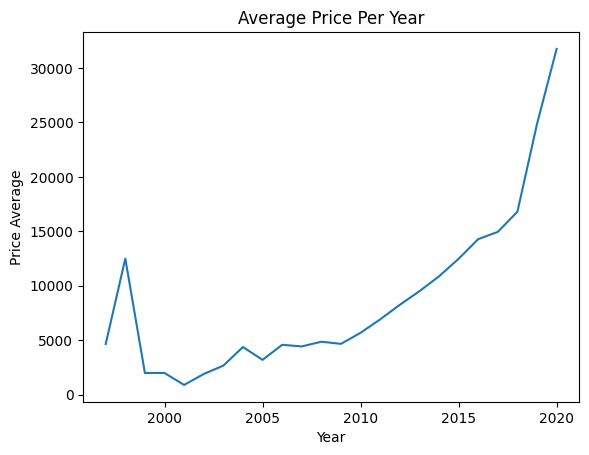

In [157]:
plt.plot(
    df_mean['year'],
    df_mean['price'],
)

plt.title('Average Price Per Year')
plt.xlabel('Year')
plt.ylabel('Price Average')

In [158]:
#Rata2 harga mobil mengalami kenaikan yang sangat drastis dari tahun 1997 ke 1998, tapi setelah itu mengalami penurunan setiap tahun sampai 2002, setalah tahun 2002 rata2 harga mobil consistently naik setiap tahun sampai tahun sekarang
